In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functools import lru_cache


In [148]:
class StringArt:

    def __init__(self, DrawImg = None, radius = 100, points = 50, imgSize = (200,200), grayFactor = 0.5):
        self.fig, self.ax = plt.subplots(figsize=(10,10)); 
        self.size = imgSize; 
        self.img = np.zeros(imgSize); 
        self.center = (imgSize[0]/2, imgSize[1]/2); 
        self.joins = set(); #contains all the joins.
        self.nPoints = points; 
        self.grayFactor = grayFactor;
        self.gap = 2*np.pi/points;
        self.radius = radius; 
        self.allJoins = []; 
        for i in range(0,points): 
            self.allJoins.append(set());
        self.points = [];
        for i in range(points):
            self.points.append((self.center[0] + self.radius*np.cos(i*self.gap), self.center[1] + self.radius*np.sin(i*self.gap))); 

    @lru_cache
    def getLinePointsBetween(self, point0, point1, width = 5):
        l = []
        for i in range(self.size[0]):
            for j in range(self.size[1]):
                dist = self.getLineDistance(point0, point1, (i,j));
                if(dist <= width):
                    l.append((i,j,dist)); 
        return l;

            

    def drawLineBetween(self, point0, point1, width):
        for (i,j,d) in self.getLinePointsBetween(point0, point1, width):
            self.img[i][j] += self.grayFactor*self.DistFunc(d, 0, 5, 2);
        #will draw a straight line between these 2 points. how should we do it though.
    
    def getLineEquation(self, point0, point1):
        #return the line equation between these 2 points. 
        #y = mx + b
        #m = (y1 - y0)/(x1 - x0)
        #b = y0 - mx0
        m = (point1[1] - point0[1])/(point1[0] - point0[0]);
        b = point0[1] - m*point0[0];
        return (m,b);

    def getLineDistance(self, point0, point1, point2):
        #return the distance between point2 and the line between point0 and point1
        #d = |ax0 + by0 + c|/sqrt(a^2 + b^2)
        #a = y1 - y0
        #b = x0 - x1
        #c = x1y0 - x0y1
        a = point1[1] - point0[1]; 
        b = point0[0] - point1[0]; 
        c = point1[0]*point0[1] - point0[0]*point1[1];
        return abs(a*point2[0] + b*point2[1] + c)/np.sqrt(a**2 + b**2); 

    def DistFunc(self,point0, point1, width, pow = 1):
        return (1 - abs(point0 - point1)/width)**(pow);

    def drawCircle(self, width = 5, radius = None, center = None, img = None):
        if(img == None):
            img = self.img;
        if(center == None):
            center = self.center;
        if(radius == None):
            radius = self.radius;
        outer = (radius + width)**2;
        inner = (radius - width)**2; 
        rsquare = radius**2;
        for i in range(0, img.shape[0]):
            for j in range(0, img.shape[1]):
                dist = (i - center[0])**2 + (j - center[1])**2;
                if inner <= dist <= outer:
                    img[i][j] += self.grayFactor*self.DistFunc(np.sqrt(dist), radius, width,2); #abs(np.sqrt(dist) - radius)/(width); 
        return img

    def showImage(self):
        self.ax.imshow(self.invertImage(self.img), cmap='gray', vmin=0, vmax=1);
    def invertImage(self,image):
        return 1-image; 
    
    


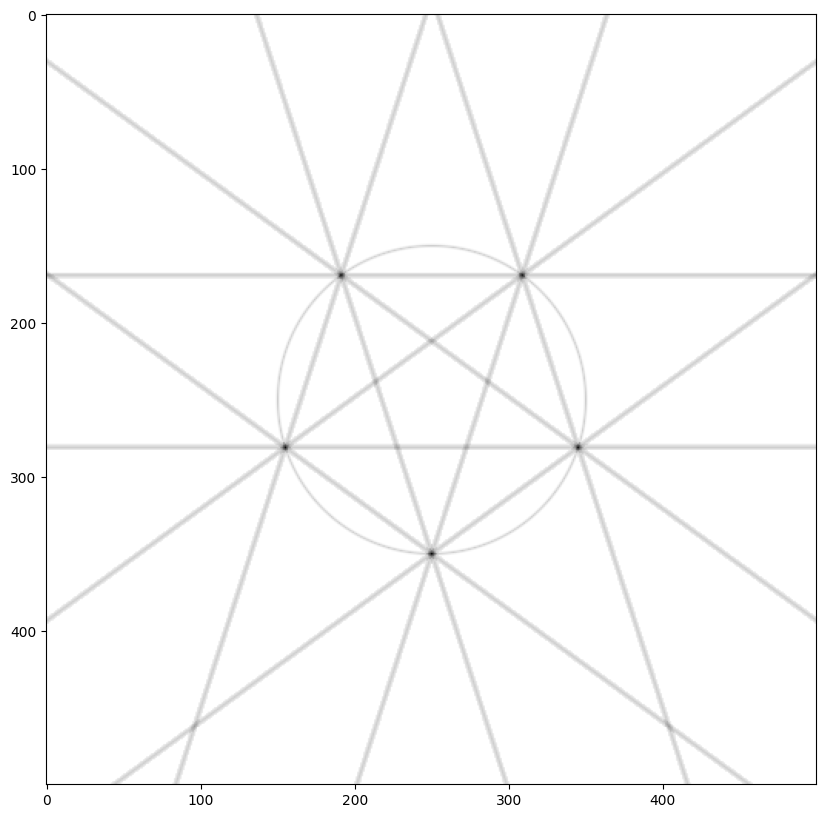

In [153]:
#now we need to make a circular image in plt.
n = 5;
SA = StringArt(points = n, imgSize=(500,500), grayFactor=0.2);
SA.drawCircle(width=2)
#print(SA.getLinePointsBetween(SA.points[1], SA.points[4], width=100))
for i in range(0,n):
    for j in range(i+1,n):
        SA.drawLineBetween(SA.points[i], SA.points[j], width=2);




# for point in SA.points:
#     SA.drawCircle(point, 10, 2);
SA.showImage()